In [1]:
# These are all the Imports that will be used for the project
import env
import acquire as a
import prepare as p
import functions as f
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
scaler= MinMaxScaler()

# Acquire
  - Here we acquire our Zillow data from the Codeup SQL database
  - Then we used pandas to read in the SQL query and save the data to our notebook

In [2]:
df= a.get_zillow()

In [3]:
df.head(10)

,Unnamed: 0,yearbuilt,taxvaluedollarcnt,taxamount,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips
0,0,NaN,27516.0,NaN,0.0,0.0,NaN,6037.0
1,1,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
2,2,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
3,3,NaN,2108.0,174.21,0.0,0.0,NaN,6037.0
4,4,2005.0,296425.0,6941.39,4.0,2.0,3633.0,6037.0
5,5,NaN,124.0,NaN,0.0,0.0,NaN,6037.0
6,6,2011.0,847770.0,10244.94,3.0,4.0,1620.0,6037.0
7,7,1926.0,646760.0,7924.68,3.0,2.0,2077.0,6037.0
8,8,NaN,6730242.0,80348.13,0.0,0.0,NaN,6037.0
9,9,NaN,15532.0,248.89,0.0,0.0,NaN,6037.0


----

# Prepare
  - Here we prepare the acquired data to make it easier to use, cleaner, and better for modeling
    - Rename columns for better use/ understanding
    - Drop columns
    - Drop Null values
    - Split data multiple times

In [4]:
# Here we use a function to prepare the data and then split it into train, val, test
train, val, test= p.prep_zillow(df)

Train shape:
(1053985, 7)
Validate shape:
(451708, 7)
Test shape:
(376424, 7)


In [5]:
# Use .head() to show the newly cleaned data
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,county
2010611,1965.0,507733.0,5728.14,3.0,2.0,1923.0,orange
1937230,2003.0,551948.0,6295.84,4.0,3.0,2420.0,ventura
170197,1964.0,657428.0,7338.40,5.0,2.0,1982.0,orange
407560,1969.0,271635.0,3150.84,4.0,2.0,1738.0,orange
980494,1963.0,69288.0,759.52,3.0,2.0,1561.0,ventura


----

# Exploration
   - Here we use the newly cleaned data to explore the unknown data and find out its secrets
     - Graph data to get a general overview of the data
     - Use statistical testing to answer our questions correctly
     - Find major drivers 

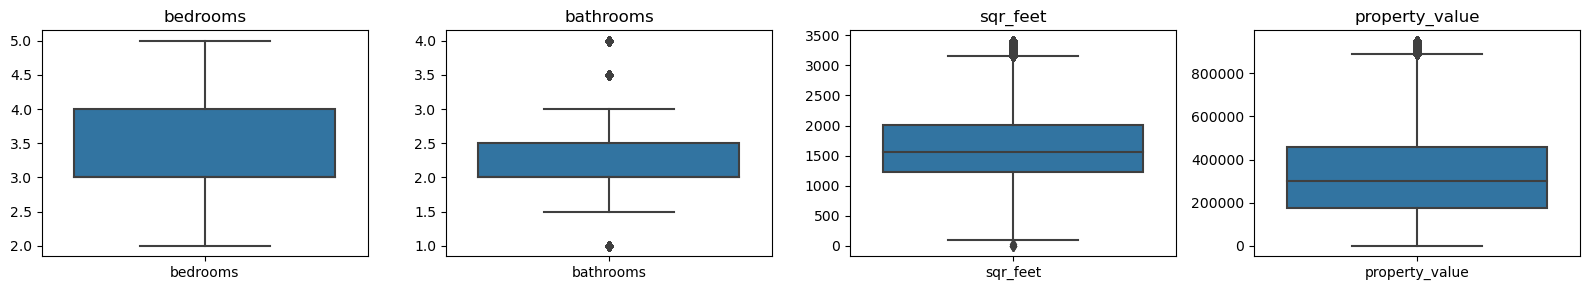

In [6]:
# plot the continuous variables from the train dataset
f.plot_box(train)

In [7]:
# creating a correlation matrix
corr=train.corr()

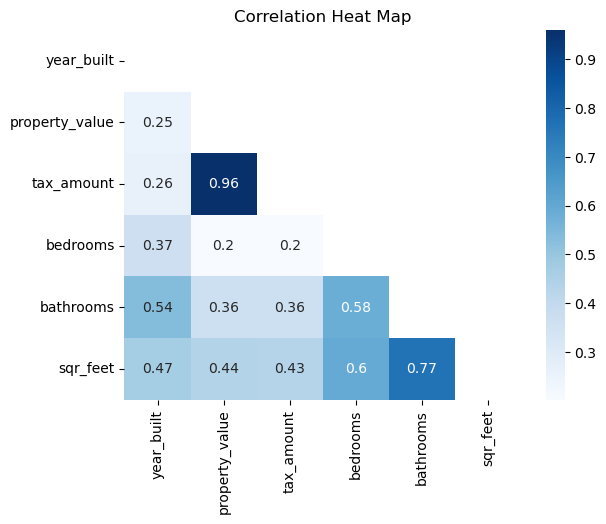

In [8]:
f.plot_heatmap(corr)

----

## Statistical Testing

$H_{o}$: There is no relationship between total Square Feet and Property Value

$H_{a}$: There is a relationship between total Square Feet and Property Value

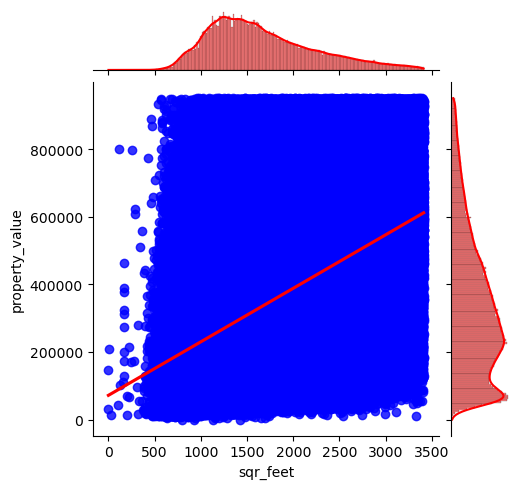

In [9]:
f.sqr_property(train)

In [10]:
r, p_value = pearsonr(train.sqr_feet, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.43717585880902654
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Square Feet and Property Value

----

$H_{o}$: There is no relationship between the Year Built and Property Value

$H_{a}$: There is a relationship between the Year Built and Property Value

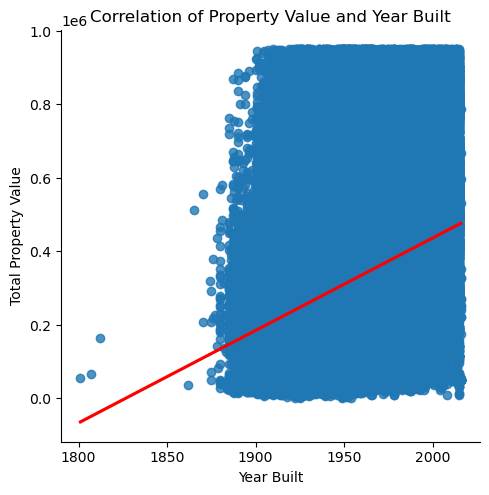

In [11]:
sns.lmplot(x='year_built', y='property_value', data= train, scatter=True, line_kws={"color": "red"})
plt.title('Correlation of Property Value and Year Built')
plt.xlabel('Year Built')
plt.ylabel('Total Property Value')
plt.show()

In [12]:
r, p_value = pearsonr(train.year_built, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2519029220078279
P-value: 0.0


- ### The graph and statistical test both show that there is a correlation between the Property Value and the Year Built. With this information, we are able to reject the Null hypothesis.

----

$H_{o}$: There is no correlation between Bedrooms and Property Value

$H_{a}$: There is a correlation between Bedroom and Property Value

Text(-1.9843749999999911, 0.5, 'Total Property Value')

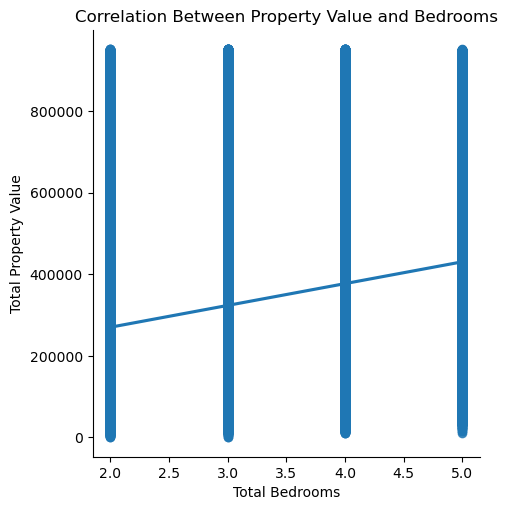

In [13]:
sns.lmplot(x='bedrooms', y='property_value', data= train, scatter=True)
plt.title('Correlation Between Property Value and Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Property Value')

In [14]:
r, p_value = pearsonr(train.bedrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.20230172660177168
P-value: 0.0


- ### With the newly found information from the graph and the statistical testing, we are able to reject the Null hypothesis.

$H_{o}$: There is no relationship between Bathrooms and Property Value

$H_{a}$: There is a relationship between Bathrooms and Property Value

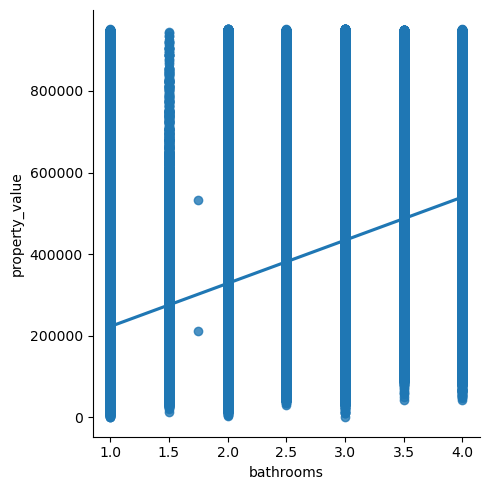

In [15]:
sns.lmplot(x='bathrooms', y='property_value', data= train, scatter=True)

In [16]:
r, p_value = pearsonr(train.bathrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.36380211936690715
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Bathrooms and Property Value

## Modeling

In [17]:
train.drop(columns= ['county'], inplace= True)
val.drop(columns= ['county'], inplace= True)
test.drop(columns= ['county'], inplace= True)

In [18]:
X_train, y_train, X_val, y_val, X_test, y_test= f.six_split(train, val, test)

In [19]:
X_train_scaled, X_val_scaled, X_test_scaled= f.mmscale(X_train, X_val, X_test)

NameError: name 'MinMaxScaler' is not defined

In [ ]:
X_train_scaled.head()

In [ ]:
f.calc_baseline(y_train, y_val)

In [ ]:
f.take_the_L(X_train_scaled, y_train, X_val_scaled, y_val)